# `Notebook Contents`
- Importing The Dependencies
- Loading The Pretrained Model
- Real Time Detection

### Importing The Dependencies

In [21]:
# PyTorch
import torch

# Matplotlib
import matplotlib.pyplot as plt

# Opencv
import cv2

In [2]:
# Clone the repo
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
Updating files:  17% (24/141)
Updating files:  18% (26/141)
Updating files:  19% (27/141)
Updating files:  20% (29/141)
Updating files:  21% (30/141)
Updating files:  22% (32/141)
Updating files:  23% (33/141)
Updating files:  24% (34/141)
Updating files:  25% (36/141)
Updating files:  26% (37/141)
Updating files:  27% (39/141)
Updating files:  28% (40/141)
Updating files:  29% (41/141)
Updating files:  30% (43/141)
Updating files:  31% (44/141)
Updating files:  32% (46/141)
Updating files:  33% (47/141)
Updating files:  34% (48/141)
Updating files:  35% (50/141)
Updating files:  36% (51/141)
Updating files:  37% (53/141)
Updating files:  38% (54/141)
Updating files:  39% (55/141)
Updating files:  40% (57/141)
Updating files:  41% (58/141)
Updating files:  42% (60/141)
Updating files:  43% (61/141)
Updating files:  44% (63/141)
Updating files:  45% (64/141)
Updating files:  46% (65/141)
Updating files:  47% (67/141)
Updating files:  48% (68/141)
Updating files:

In [3]:
# Change the dir and install the requirements
%cd yolov5
!pip install -r requirements.txt

d:\ML Engineer\ComputerVision\Projects\ObjectDetection\YOLOv5ObjDet\yolov5
     ---------------------------------------- 1.1/1.1 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.4.1
    Uninstalling setuptools-63.4.1:
      Successfully uninstalled setuptools-63.4.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


### Loading The Pretrained Model

In [2]:
# Loading yolov5s from pytorch hub
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\Moham/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-4-12 Python-3.9.13 torch-1.13.1 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
# The layers
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [51]:
def detect(img):
    %matplotlib inline
    res = model(img)
    plt.imshow(res.render()[0])
    plt.show()

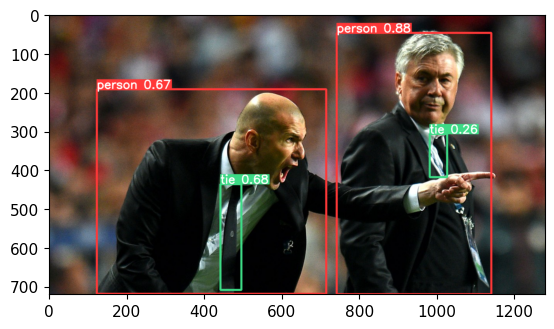

In [52]:
# Testing an image
detect('https://ultralytics.com/images/zidane.jpg')

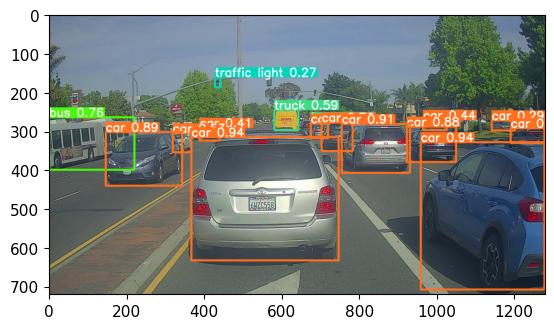

In [62]:
# Testing an image
detect('img.jpg')

### Real Time Detection

In [50]:
# Capture a video
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    pred = model(frame)
    pred = pred.render()[0]
    cv2.imshow('Real Time Detection',pred)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()